Морфологический анализ <br/>
Домашнее задание 11 <br/>
**Голев Александр 135М**

# Реализовать следующий метод выделения отличий изображений f и g по форме.


In [122]:
import cv2
from IPython.display import Image, display
import matplotlib.pyplot as plt
import numpy as np
import func as f
import random

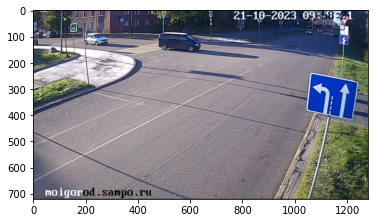

In [ ]:
# Загружаем изображение
f_rgb = cv2.imread('g_2.png')
plt.imshow(cv2.cvtColor(f_rgb, cv2.COLOR_BGR2RGB))

### 2. Аппроксимация формы фрагмента изображения f формой мозаичного изображения.


In [76]:
def get_levels():
    brs = np.linspace(0, 255, 8)
    replacement = []
    for c1 in brs:
        for c2 in brs:
            for c3 in brs:
                replacement.append(np.array([c1,c2,c3]))
    return np.array(replacement)

In [77]:
replacement = get_levels().astype(np.uint8)

Посмотрим на уровни

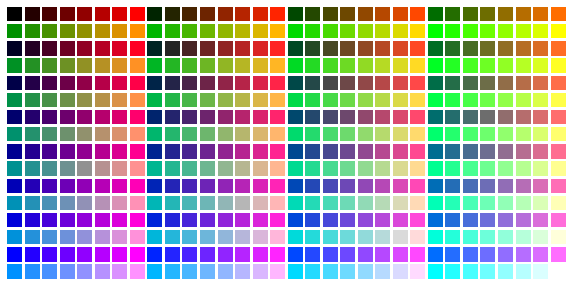

In [79]:
fig, ax = plt.subplots(16, 32, figsize=(10, 5))
colors = replacement.reshape((16, 32, 3))

# Отключаем оси
for row in ax:
    for col in row:
        col.axis('off')

# Выводим цветовые квадраты
for i in range(16):
    for j in range(32):
        ax[i, j].imshow(cv2.cvtColor(np.full((10, 10, 3),colors[i, j]), cv2.COLOR_BGR2RGB), interpolation='nearest')
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

plt.show()

Аппроксимация

In [54]:
def find_level(pixel):
    global replacement
    return replacement[np.argmin(np.linalg.norm(pixel - replacement, axis=1))]

def RGB_approximation(image):
    return np.vectorize(find_level, signature='(3)->(3)')(image).astype(np.uint8)

Посмотрим на аппроксимацию

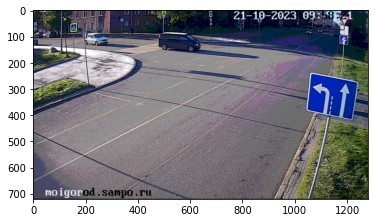

In [89]:
f_approx = RGB_approximation(f_rgb.copy())
plt.imshow(cv2.cvtColor(f_approx, cv2.COLOR_BGR2RGB))

In [16]:
def nevayz(image, proj):
    return np.square(np.linalg.norm(image - proj))


### 3. Для каждой полученной формы фрагмента изображения f и соответствующего фрагмента изображения g
вычисляется их морфологическая разность, которая рассматривается как соответствующий фрагмент формируемого изображения h как отличия изображений.

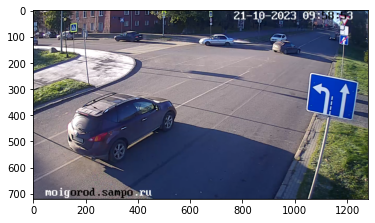

In [103]:
# Загружаем изображение
g_rgb = cv2.imread('g.png')
plt.imshow(cv2.cvtColor(g_rgb, cv2.COLOR_BGR2RGB))

In [96]:
def RGB_projection(g, f):
    # Выделяем уникальные цвета исходного изображения
    colors = np.unique(f.reshape(-1, f.shape[2]), axis=0)
    for c in colors:
        #маска определенного цвета
        mask = np.all(f == c, axis=2)
        mask1 = np.repeat(mask[:, :, np.newaxis], 3, axis=2)
        g[mask] = np.ma.array(g, mask=~mask1).mean((0,1))
    return g

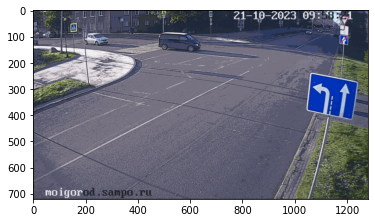

In [104]:
g_proj = RGB_projection(g_rgb.copy(),f_approx.copy())
plt.imshow(cv2.cvtColor(g_proj, cv2.COLOR_BGR2RGB))

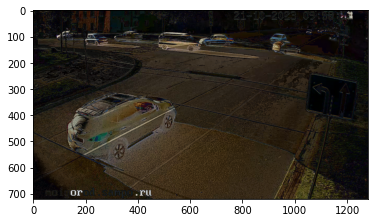

In [109]:
plt.imshow(cv2.cvtColor(cv2.absdiff(g_rgb,g_proj), cv2.COLOR_BGR2RGB))

In [110]:
def mrp_diff(form,g):
    g_proj = RGB_projection(g.copy(),form)
    return cv2.absdiff(g,g_proj)

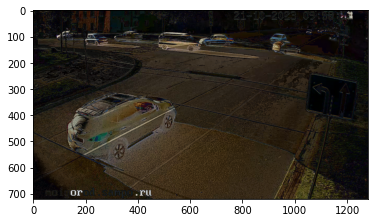

In [111]:
example_diff = mrp_diff(f_approx.copy(),g_rgb.copy())
plt.imshow(cv2.cvtColor(example_diff, cv2.COLOR_BGR2RGB))

### 4. Изображения f и g разделяются на фрагменты (по возможности, непересекающиеся) заданного размера.
Разделим изображение

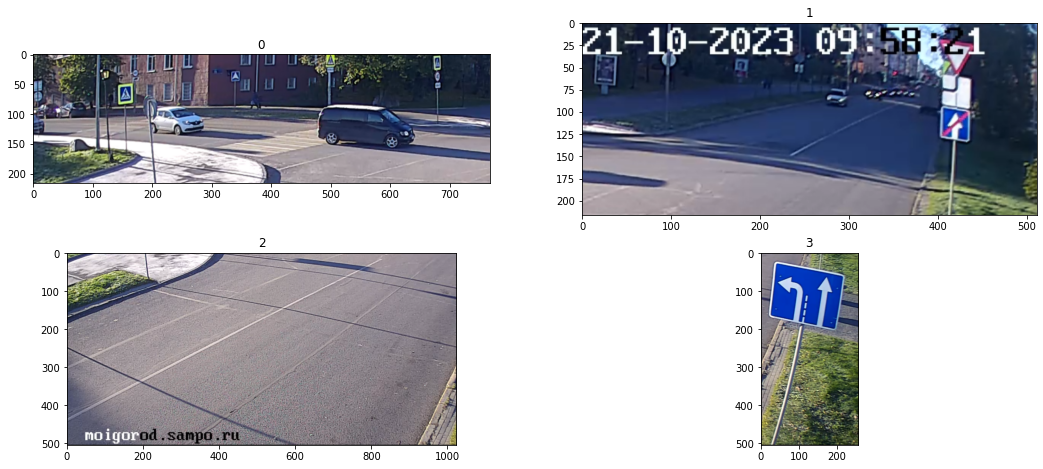

In [114]:
height, width, c = f_rgb.shape

    # Разрежьте изображение на две части по горизонтали (пополам)
middle_y = int(height*0.3)   # Середина высоты
middle_x =  int(width*0.6)  # Середина ширины
top_half = f_rgb[:middle_y, :]  # Верхняя половина
bottom_half = f_rgb[middle_y:, :]  # Нижняя половина


left_top = top_half[:, :middle_x]  # Левая половина
right_top = top_half[:, middle_x:]  # Правая половина
left_bottom = bottom_half[:, :int(width*0.8)]
right_bottom = bottom_half[:, int(width*0.8):]

f.showOneLine([left_top, right_top,left_bottom,right_bottom],[str(x) for x in range(4)],dim = 2)


In [117]:
top_half_g = g_rgb[:middle_y, :]  # Верхняя половина
bottom_half_g = g_rgb[middle_y:, :]  # Нижняя половина

left_top_g = top_half_g[:, :middle_x]  # Левая половина
right_top_g = top_half_g[:, middle_x:]  # Правая половина
left_bottom_g = bottom_half_g[:, :int(width*0.8)]
right_bottom_g = bottom_half_g[:, int(width*0.8):]

In [118]:
def get_diff_img(f,g):
    f_approx = RGB_approximation(f.copy())
    return mrp_diff(f_approx,g)

In [121]:
tmp_img = []
for f_img,g_img in zip([left_top, right_top,left_bottom,right_bottom],[left_top_g,right_top_g, left_bottom_g,right_bottom_g]):
    tmp_img.append(get_diff_img(f_img,g_img))

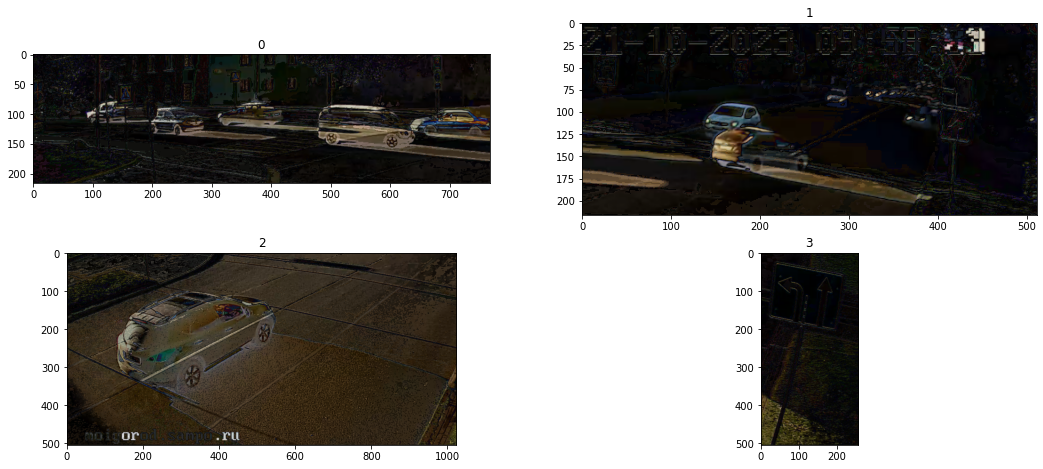

True

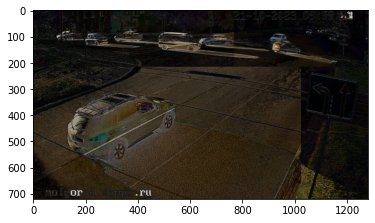

In [123]:
f.showOneLine(tmp_img,[str(x) for x in range(4)],dim = 2)

merged_image = np.hstack((tmp_img[0], tmp_img[1]))
merged_image2 = np.hstack((tmp_img[2], tmp_img[3]))
merged_image = np.vstack((merged_image,merged_image2))

plt.imshow(cv2.cvtColor(merged_image, cv2.COLOR_BGR2RGB))
cv2.imwrite('diff.png', merged_image)

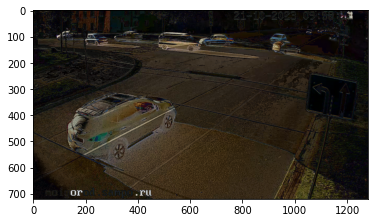

In [124]:
# Отобразим результаты для варианта без разделения на части
plt.imshow(cv2.cvtColor(example_diff, cv2.COLOR_BGR2RGB))


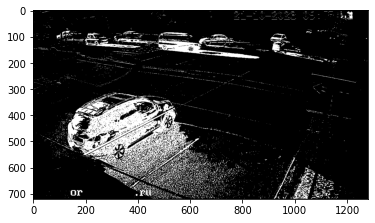

In [126]:
threshold_value = 64  # Adjust this threshold value as needed
_, binary_image = cv2.threshold(cv2.cvtColor(example_diff, cv2.COLOR_BGR2GRAY), threshold_value, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(binary_image, cv2.COLOR_BGR2RGB))